In [1]:
import numpy as np
from Ejercicio1 import misplines, derivar
import matplotlib.pyplot as plt

In [2]:
plt.rc('figure',figsize=(15,15))
plt.rc('axes',labelsize=20)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('legend',fontsize=20)
plt.rc('lines',linewidth=5, markersize=10)

Lo primero que hago es definir las _mediciones_ a partir de un arhivo donde tengo guardados los datos:

In [3]:
z,T = np.loadtxt('DATA.txt',unpack=True) # loadtxt se importa de numpy

In [4]:
print ("Z = ", z)
print ("T = ", T)

Z =  [0.  0.5 1.  1.5 2.  2.5 3. ]
T =  [70. 68. 55. 22. 13. 11. 10.]


In [5]:
# defino el número de puntos:
N=len(z)
print( "N = ", N)

N =  7


con estos datos, obtengo los coeficiontes a,b,c,d a oartir de la teoría vista. La metodología está implementada en la función `misplines` dentro del archivo `Ejercicio1.py`, que importamos con la sentencia

```python
from Ejercicio1 import *
```

In [6]:
a,b,c,d = misplines(z,T,'funcion')

Luego calculo las derivadas de distintas maneras:

In [7]:
# primera derivada
dT = derivar(z,T)
da,db,dc,dd=misplines(z,dT,'derivada')
# segunda derivada
ddT=derivar(z,dT)
dda,ddb,ddc,ddd=misplines(z,ddT,'derivadasegunda')

el grafico se va armando sin mostrar hasta que se pide explicitamente.
pyplot.plot funciona como el plot de matlab , grafica vectores. 
notar que se importa de matplotlib.pyplot

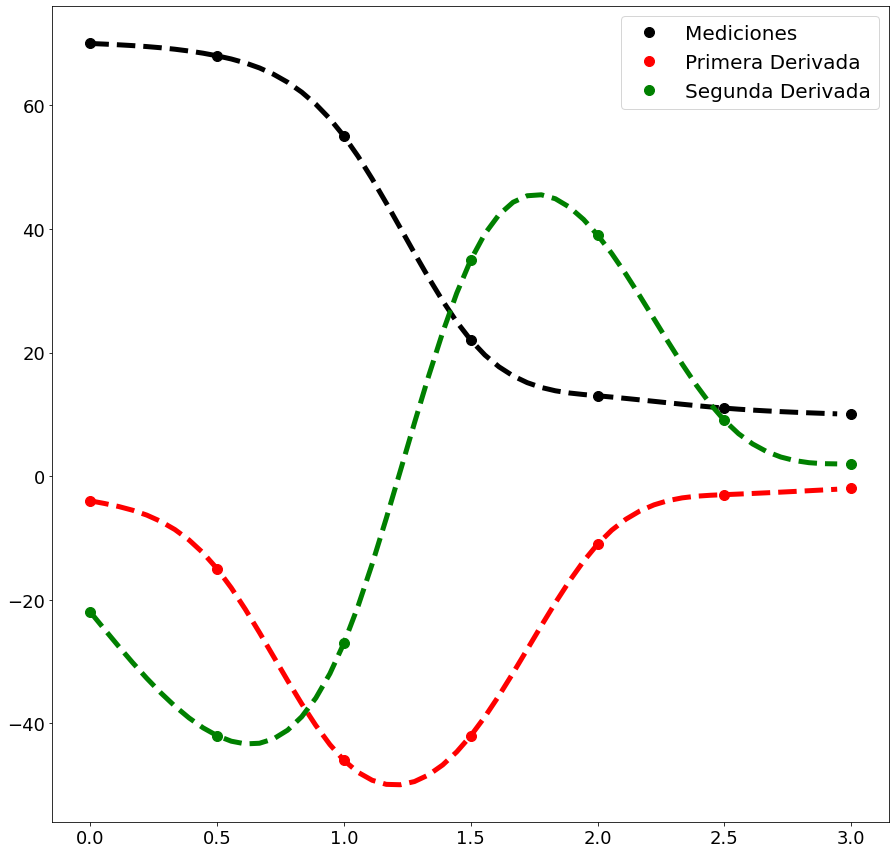

In [8]:
plt.plot(z,T,'ok',label="Mediciones")
plt.plot(z,dT,'or',label="Primera Derivada")
plt.plot(z,ddT,'og',label="Segunda Derivada")

zz = np.array([])
TT = np.array([])
dTT = np.array([])
ddTT = np.array([])


for i in np.linspace(0,N-2,N-1).astype(int):
    zi=np.linspace(z[i],z[i+1],10).astype(float)
    zz = np.hstack((zz, zi[:-1]))
#funcion:
    Ti=a[i]*(zi-z[i])**3+b[i]*(zi-z[i])**2+c[i]*(zi-z[i]) +d[i]
    TT = np.hstack((TT, Ti[:-1]))
# Derivada:
    dTi=da[i]*(zi-z[i])**3+db[i]*(zi-z[i])**2+dc[i]*(zi-z[i]) +dd[i]
    dTT = np.hstack((dTT, dTi[:-1]))
    
#Derivada Segunda:
    ddTi=dda[i]*(zi-z[i])**3+ddb[i]*(zi-z[i])**2+ddc[i]*(zi-z[i]) +ddd[i]
    ddTT = np.hstack((ddTT, ddTi[:-1]))

plt.plot(zz,TT,'--k', lw=5)
plt.plot(zz,dTT,'--r', lw=5)
plt.plot(zz,ddTT,'--g', lw=5)
plt.legend()

# Derivadas directas

In [9]:
dT_z = np.gradient(TT,zz)

In [10]:
ddT_z = np.gradient(dT_z,zz)

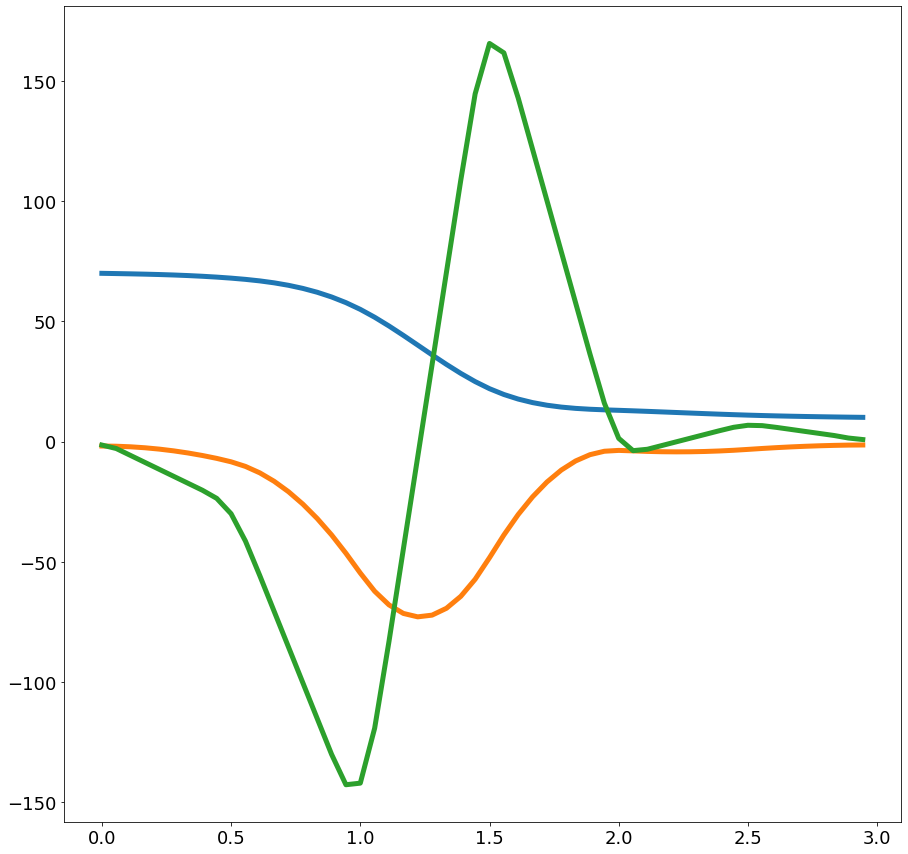

In [11]:
plt.plot(zz,TT, label='función')
plt.plot(zz,dT_z, label='primera derivada')
plt.plot(zz,ddT_z, label='primera derivada')

# derivadas analíticas:

In [12]:
import pdb

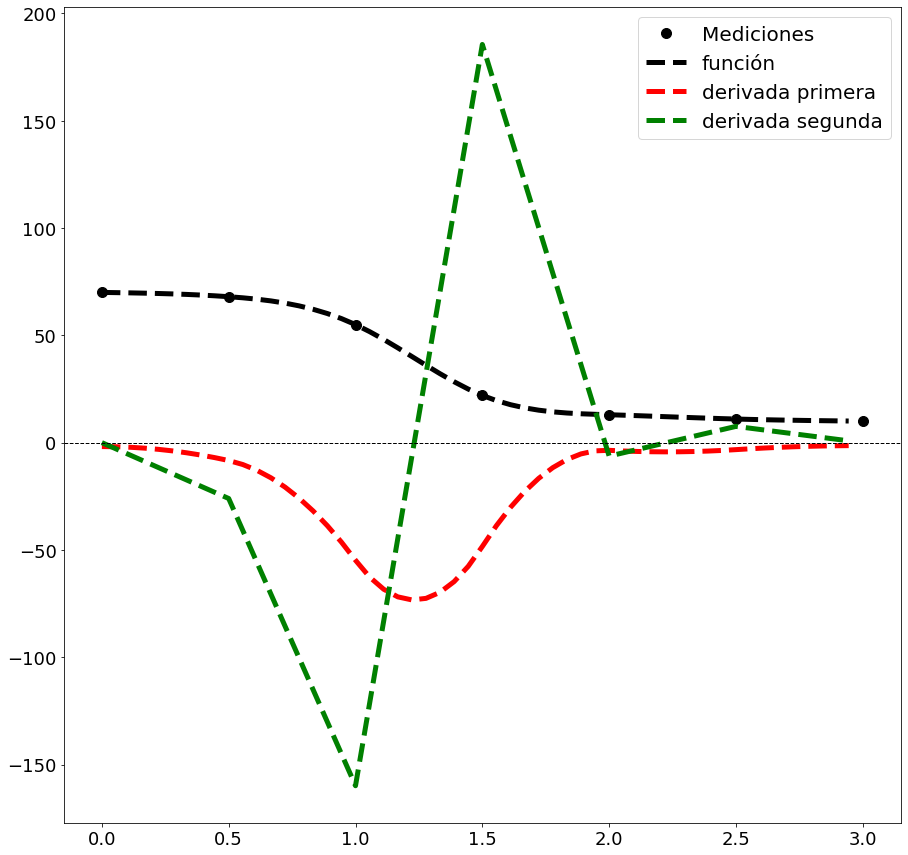

In [13]:
plt.plot(z,T,'ok',label="Mediciones")
#plt.plot(z,dT,'or',ms=10,label="Primera Derivada")
#plt.plot(z,ddT,'og',ms=10,label="Segunda Derivada")

zz = np.array([])
lytic_TT = np.array([])
lytic_dTT = np.array([])
lytic_ddTT = np.array([])


for i in np.linspace(0,N-2,N-1).astype(int):
    zi = np.linspace(z[i],z[i+1],10).astype(float)
    zz = np.hstack((zz, zi[:-1]))
#funcion: ya la calculé antes
    lytic_Ti = a[i]*(zi-z[i])**3+b[i]*(zi-z[i])**2+c[i]*(zi-z[i]) +d[i]
    lytic_TT = np.hstack((lytic_TT, lytic_Ti[:-1]))
# Derivada:
    lytic_dTi = 3*a[i]*(zi-z[i])**2+2*b[i]*(zi-z[i])+c[i]
    lytic_dTT = np.hstack((lytic_dTT, lytic_dTi[:-1]))
    
#Derivada Segunda:
    lytic_ddTi = 6*a[i]*(zi-z[i])+2*b[i]
    lytic_ddTT = np.hstack((lytic_ddTT, lytic_ddTi[:-1]))

plt.plot(zz,lytic_TT,'--k', label='función')
plt.plot(zz,lytic_dTT,'--r', label='derivada primera')
plt.plot(zz,lytic_ddTT,'--g', label='derivada segunda')
plt.axhline(0,ls='--', c=[0,0,0], lw = 1)
plt.legend()

# Comparar los métodos para cada cantidad

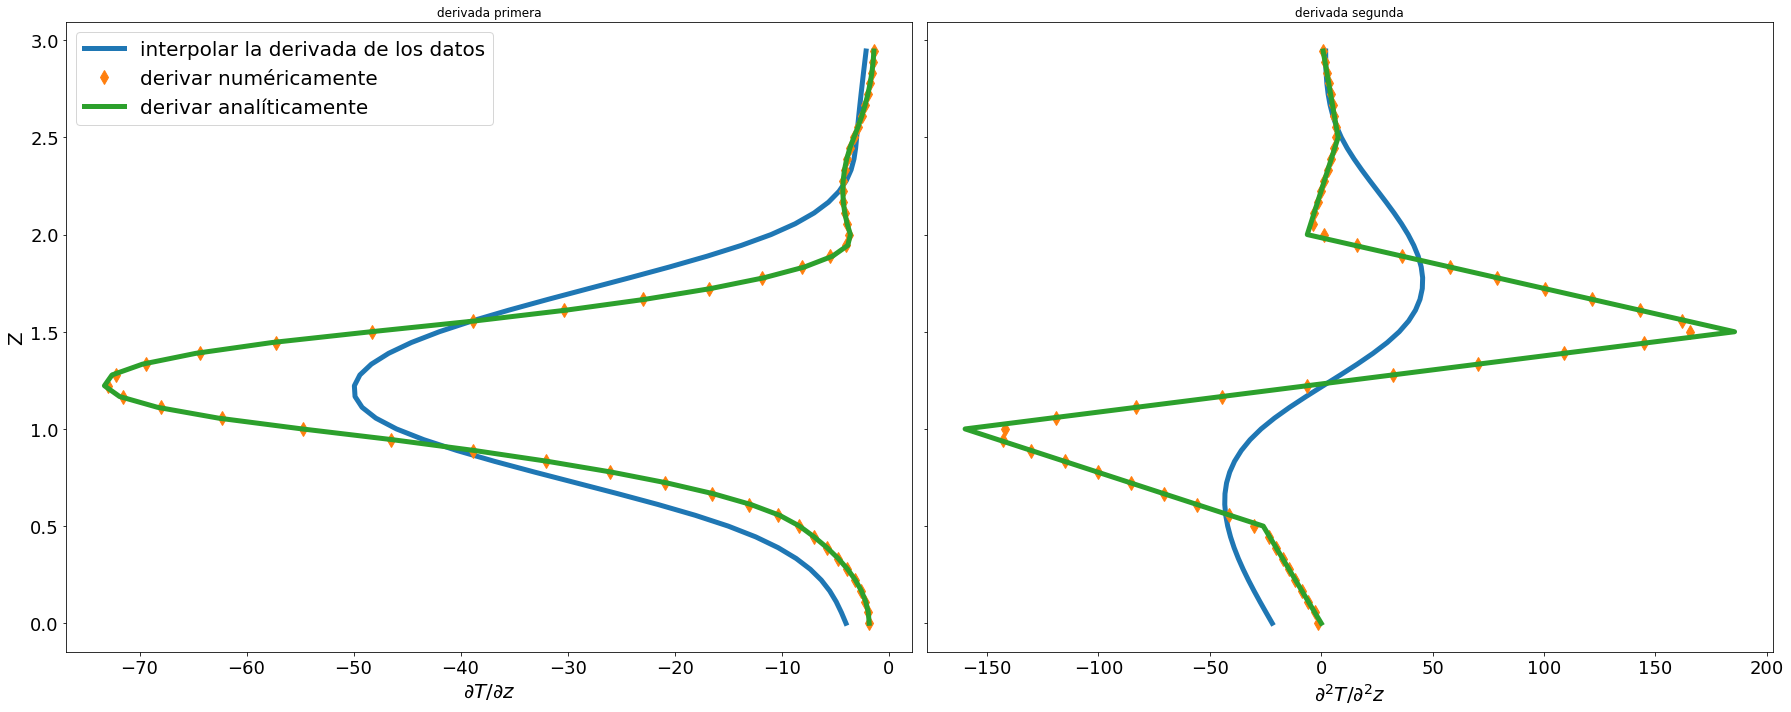

In [34]:
fig, ax = plt.subplots(1,2 , figsize=(25,10))
ax[0].plot(dTT, zz, label='interpolar la derivada de los datos')
ax[0].plot(dT_z, zz, 'd', label='derivar numéricamente')
ax[0].plot(lytic_dTT, zz, label='derivar analíticamente')
ax[0].set_title('derivada primera')
ax[0].set_ylabel('Z')
ax[0].set_xlabel('$\partial T / \partial z$')
ax[0].legend()
ax[1].plot(ddTT, zz, label='interpolar la derivada')
ax[1].plot(ddT_z, zz, 'd', label='derivar numéricamente')
ax[1].plot(lytic_ddTT, zz, label='derivar analíticamente')
ax[1].set_title('derivada segunda')
ax[1].set_xlabel('$\partial^2 T / \partial^2 z$')
ax[1].tick_params(labelleft = False)
fig.tight_layout()